In [13]:
library(forecast)
library(tseries)
library(data.table)
library(xlsx)
library(ggplot2)
library("readxl")
library(plyr)

### gdp drop

In [89]:
my_data <- read_excel("prediction_data_v1.xlsx")

# my_data<-my_data[c('country','cpi','gdp','hale','efi','democracy')]

drops <- c('X__1')
my_data=my_data[ , !(names(my_data) %in% drops)]

# head(my_data)
# colnames(my_data)

my_data$IT.NET.BBND.P2_by_population<-my_data$IT.NET.BBND.P2/my_data$SP.POP.TOTL
my_data$BN.KLT.DINV.CD_by_gdp<-my_data$BN.KLT.DINV.CD/my_data$	gdp2007
head(my_data)

BN.CAB.XOKA.GD.ZS,BN.KLT.DINV.CD,CM.MKT.TRAD.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.ATM.CO2E.PC,EN.ATM.GHGT.ZG,IT.NET.BBND.P2,MS.MIL.TOTL.TF.ZS,MS.MIL.XPND.GD.ZS,⋯,drop,drop_per_cent,mod,gdp2006,gdp2007,gdp2008,predict_by2006,predict_by2007,IT.NET.BBND.P2_by_population,BN.KLT.DINV.CD_by_gdp
17.504449,1805123607,NA,37.50000,132.6813,1.197844,-27.78384,0.06605384,1.5548121,3.3622318,⋯,-32414759359,-0.30039493,0 2 0,41789478661,60448921272,8.417803e+10,1.217644e+11,1.172220e+11,3.145767e-09,0.02986197
-10.754245,-647365284,NA,100.00000,1213.1244,1.322335,-11.09841,0.31583382,1.1555083,1.8207653,⋯,-1993303381,-0.14199830,0 1 0,8992642349,10701011897,1.288135e+10,1.532848e+10,1.550594e+10,1.063407e-07,-0.06049571
NA,NA,18.45719,100.00000,11688.3218,22.439801,131.70997,6.55127250,1.2773414,3.2805214,⋯,-119485739306,-0.32030868,0 2 0,222116541865,257916133424,3.154746e+11,3.663212e+11,3.858783e+11,1.083918e-06,NA
-29.600571,-338204733,NA,92.14981,NA,5.136473,28.41783,2.68492956,NA,NA,⋯,-199358519,-0.14068279,0 2 0,1149025481,1302388926,1.359734e+09,1.541221e+09,1.419603e+09,2.938170e-05,-0.25968029
-7.515304,-30020094089,160.84757,100.00000,10972.8917,17.865260,120.94707,NA,0.5013344,1.8887479,⋯,-329736717098,-0.26234020,0 2 0,747572626535,853764622753,1.055335e+12,1.205244e+12,1.304495e+12,NA,-0.03516203
3.816917,10177102307,33.41499,100.00000,8207.4747,8.406419,16.83406,19.51521651,0.8256138,0.9056589,⋯,-30017251570,-0.07019748,0 1 0,334309371472,386458951547,4.276115e+11,4.943155e+11,4.731463e+11,2.352510e-06,0.02633424


In [127]:
data=my_data

# names(data40)
normfunc <- function(x) {
    (x - min(x, na.rm=TRUE))/(max(x,na.rm=TRUE) -
min(x, na.rm=TRUE))
}

x_list=c('BN.CAB.XOKA.GD.ZS', 'BN.KLT.DINV.CD_by_gdp' ,'CM.MKT.TRAD.GD.ZS', 'EG.ELC.ACCS.ZS' ,
  'EG.USE.ELEC.KH.PC' ,'EN.ATM.CO2E.PC', 'EN.ATM.GHGT.ZG' ,'SP.POP.TOTL' ,
  'IT.NET.BBND.P2', 'MS.MIL.TOTL.TF.ZS' ,'MS.MIL.XPND.GD.ZS' ,'NE.CON.PETC.ZS' ,
  'NE.EXP.GNFS.ZS' ,'NE.IMP.GNFS.ZS' ,'NE.TRD.GNFS.ZS', 'NV.AGR.TOTL.ZS' ,'NY.GDP.PETR.RT.ZS',
  'NY.GDP.TOTL.RT.ZS', 'NY.GDS.TOTL.ZS' ,'SL.TLF.TOTL.FE.ZS' ,'SP.POP.1564.TO.ZS' ,'SP.POP.GROW' ,
  'SP.URB.GROW', 'SP.URB.TOTL.IN.ZS', 'ST.INT.RCPT.XP.ZS' , 'IT.NET.BBND.P2_by_population')

y_list=c('iso3' ,'real',
  'predict_arima' ,'drop', 'drop_per_cent', 'mod' ,'gdp2006',
  'gdp2007' ,'gdp2008', 'predict_by2006', 'predict_by2007')

data_norm <- as.data.frame(lapply(data[x_list], normfunc))
data_x_norm<-data_norm

data_norm<-cbind(data_norm,data[y_list])

# data_norm

In [124]:
# missing

my_data=data_norm

non_missing=my_data[complete.cases(my_data), ]

nrow(non_missing)

# summary(non_missing)

non_missing$iso3

# head(non_missing)

[1] 43

[1] "AUT" "BEL" "BGD" "BGR" "BRA" "CAN" "CHE" "CHL" "CHN" "COL" "CYP" "DEU"
[13] "EGY" "ESP" "FRA" "GBR" "GHA" "GRC" "IDN" "IND" "IRL" "ITA" "JOR" "KEN"
[25] "KOR" "LKA" "LUX" "MAR" "MEX" "MLT" "MYS" "NAM" "NGA" "NLD" "NOR" "PAK"
[37] "PER" "PHL" "PRT" "THA" "TUR" "USA" "ZAF"

In [130]:
# my_data=data_norm

# # my_data$real<-as.numeric(as.character(my_data$real))
# # str(as.numeric(my_data$real))

# sorted=my_data[order(my_data$real,decreasing = TRUE),] 
# data40=head(sorted, n = 45)
# # head(data40)

# summary(data40)



output=non_missing
write.xlsx(output, "prediction_data_v1_43.xlsx")

In [129]:
# drops <- c('X__1')
# my_data=my_data[ , !(names(my_data) %in% drops)]

data=non_missing[x_list]

d<-data.frame(data)
# d <- data.frame(import=data$NE.IMP.GNFS.ZS,
#                 trade=data$NE.TRD.GNFS.ZS,
#                 resource_rent=data$NY.GDP.TOTL.RT.ZS,
#                 income_abroad=data$NY.GSR.NFCY.CD,
#                 population_growth=data$SP.POP.GROW,
#                 urban_population=data$SP.URB.TOTL.IN.ZS
#                )
cor(d)

,BN.CAB.XOKA.GD.ZS,BN.KLT.DINV.CD_by_gdp,CM.MKT.TRAD.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.ATM.CO2E.PC,EN.ATM.GHGT.ZG,SP.POP.TOTL,IT.NET.BBND.P2,MS.MIL.TOTL.TF.ZS,⋯,NY.GDP.PETR.RT.ZS,NY.GDP.TOTL.RT.ZS,NY.GDS.TOTL.ZS,SL.TLF.TOTL.FE.ZS,SP.POP.1564.TO.ZS,SP.POP.GROW,SP.URB.GROW,SP.URB.TOTL.IN.ZS,ST.INT.RCPT.XP.ZS,IT.NET.BBND.P2_by_population
BN.CAB.XOKA.GD.ZS,1.00000000,0.16715214,0.11235006,-0.12277886,0.19398096,0.03862145,0.07066206,0.15835568,0.16684252,-0.46410481,⋯,0.42818473,0.40385689,0.60995168,0.18370082,-0.02910727,-0.03843358,0.160909823,-0.06670498,-0.51634297,0.12973505
BN.KLT.DINV.CD_by_gdp,0.16715214,1.00000000,0.07902612,-0.02673704,0.18772862,0.24381421,-0.02277089,0.03260455,0.02777432,-0.07085206,⋯,0.01984864,0.02638440,0.24806537,0.18409503,-0.06953794,0.15292071,0.132508381,-0.11297370,-0.09472908,-0.18911443
CM.MKT.TRAD.GD.ZS,0.11235006,0.07902612,1.00000000,0.38140448,0.42965278,0.43462544,-0.18821722,0.27238339,0.57354543,-0.04318720,⋯,-0.12899484,-0.24933418,0.20834076,0.15321576,0.35113289,-0.19328244,-0.219577659,0.30445202,-0.20923587,-0.18922230
EG.ELC.ACCS.ZS,-0.12277886,-0.02673704,0.38140448,1.00000000,0.44973760,0.52598573,-0.47636730,-0.08238593,0.53531605,0.22394239,⋯,-0.19618279,-0.30427405,0.31570679,-0.05402256,0.75425427,-0.37729570,-0.618176600,0.70090899,-0.09102508,0.16856951
EG.USE.ELEC.KH.PC,0.19398096,0.18772862,0.42965278,0.44973760,1.00000000,0.81483779,-0.33253312,-0.17836407,0.81201354,-0.16891159,⋯,-0.05829112,-0.21795959,0.40671187,0.40626710,0.40630778,-0.27196198,-0.417299821,0.55426306,-0.26028535,0.33997822
EN.ATM.CO2E.PC,0.03862145,0.24381421,0.43462544,0.52598573,0.81483779,1.00000000,-0.36596950,-0.12890385,0.74481042,-0.13039997,⋯,-0.19984846,-0.33740871,0.38933592,0.35765610,0.50759428,-0.26406238,-0.402711179,0.60779575,-0.18469682,0.44749774
EN.ATM.GHGT.ZG,0.07066206,-0.02277089,-0.18821722,-0.47636730,-0.33253312,-0.36596950,1.00000000,0.11760672,-0.43176492,0.17298894,⋯,0.05275930,0.26048064,-0.22649968,-0.06269175,-0.40105826,0.30617912,0.496260780,-0.36684517,0.26630474,-0.15119080
SP.POP.TOTL,0.15835568,0.03260455,0.27238339,-0.08238593,-0.17836407,-0.12890385,0.11760672,1.00000000,-0.21233671,-0.20782551,⋯,0.05328963,0.09121872,0.34607521,-0.12532159,0.10807133,-0.03591176,0.226627339,-0.32386266,-0.23577001,-0.12703830
IT.NET.BBND.P2,0.16684252,0.02777432,0.57354543,0.53531605,0.81201354,0.74481042,-0.43176492,-0.21233671,1.00000000,-0.18869337,⋯,-0.20240919,-0.40990745,0.37661066,0.42319353,0.50923363,-0.41410194,-0.568847000,0.66793628,-0.33171092,0.31158592
MS.MIL.TOTL.TF.ZS,-0.46410481,-0.07085206,-0.04318720,0.22394239,-0.16891159,-0.13039997,0.17298894,-0.20782551,-0.18869337,1.00000000,⋯,-0.07949556,-0.15376832,-0.42468625,-0.58358523,-0.01705133,0.20161342,-0.014841342,0.10009705,0.57381828,-0.08091809


In [ ]:
data<-cbind(my_data[1:6],my_data[7:10])
# data

linearMod <- lm(drop_cent_gdp ~NE.IMP.GNFS.ZS+NE.TRD.GNFS.ZS+NY.GDP.TOTL.RT.ZS+NY.GSR.NFCY.CD+SP.POP.GROW
                +SP.URB.TOTL.IN.ZS
                , data=data)  # build linear regression model on full data
print(linearMod)
summary(linearMod) 


Call:
lm(formula = drop_cent_gdp ~ NE.IMP.GNFS.ZS + NE.TRD.GNFS.ZS + 
    NY.GDP.TOTL.RT.ZS + NY.GSR.NFCY.CD + SP.POP.GROW + SP.URB.TOTL.IN.ZS, 
    data = data)

Coefficients:
      (Intercept)     NE.IMP.GNFS.ZS     NE.TRD.GNFS.ZS  NY.GDP.TOTL.RT.ZS  
        1.018e-01          3.972e-03         -2.266e-03          2.864e-03  
   NY.GSR.NFCY.CD        SP.POP.GROW  SP.URB.TOTL.IN.ZS  
        3.864e-13          6.774e-03         -2.157e-03  




Call:
lm(formula = drop_cent_gdp ~ NE.IMP.GNFS.ZS + NE.TRD.GNFS.ZS + 
    NY.GDP.TOTL.RT.ZS + NY.GSR.NFCY.CD + SP.POP.GROW + SP.URB.TOTL.IN.ZS, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41970 -0.09299 -0.01031  0.10063  0.45598 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        1.018e-01  4.863e-02   2.093  0.03888 * 
NE.IMP.GNFS.ZS     3.972e-03  1.461e-03   2.719  0.00771 **
NE.TRD.GNFS.ZS    -2.266e-03  8.121e-04  -2.791  0.00630 **
NY.GDP.TOTL.RT.ZS  2.864e-03  1.387e-03   2.065  0.04154 * 
NY.GSR.NFCY.CD     3.864e-13  6.924e-13   0.558  0.57806   
SP.POP.GROW        6.774e-03  9.311e-03   0.728  0.46861   
SP.URB.TOTL.IN.ZS -2.157e-03  7.238e-04  -2.980  0.00362 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1554 on 100 degrees of freedom
Multiple R-squared:  0.2846,	Adjusted R-squared:  0.2416 
F-statistic: 6.629 on 6 and 100 DF,  p-value: 6.342e-0

In [39]:
data<-cbind(dfNorm,my_data[7:10])
# data

linearMod <- lm(drop_cent_gdp ~NE.IMP.GNFS.ZS+NE.TRD.GNFS.ZS+NY.GDP.TOTL.RT.ZS+NY.GSR.NFCY.CD+SP.POP.GROW
                +SP.URB.TOTL.IN.ZS
                , data=data)  # build linear regression model on full data
print(linearMod)
summary(linearMod) 


Call:
lm(formula = drop_cent_gdp ~ NE.IMP.GNFS.ZS + NE.TRD.GNFS.ZS + 
    NY.GDP.TOTL.RT.ZS + NY.GSR.NFCY.CD + SP.POP.GROW + SP.URB.TOTL.IN.ZS, 
    data = data)

Coefficients:
      (Intercept)     NE.IMP.GNFS.ZS     NE.TRD.GNFS.ZS  NY.GDP.TOTL.RT.ZS  
          0.04721            0.89152           -0.84640            0.15036  
   NY.GSR.NFCY.CD        SP.POP.GROW  SP.URB.TOTL.IN.ZS  
          0.07495            0.11220           -0.19502  




Call:
lm(formula = drop_cent_gdp ~ NE.IMP.GNFS.ZS + NE.TRD.GNFS.ZS + 
    NY.GDP.TOTL.RT.ZS + NY.GSR.NFCY.CD + SP.POP.GROW + SP.URB.TOTL.IN.ZS, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41970 -0.09299 -0.01031  0.10063  0.45598 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)        0.04721    0.06010   0.786  0.43400   
NE.IMP.GNFS.ZS     0.89152    0.32783   2.719  0.00771 **
NE.TRD.GNFS.ZS    -0.84640    0.30329  -2.791  0.00630 **
NY.GDP.TOTL.RT.ZS  0.15036    0.07282   2.065  0.04154 * 
NY.GSR.NFCY.CD     0.07495    0.13430   0.558  0.57806   
SP.POP.GROW        0.11220    0.15422   0.728  0.46861   
SP.URB.TOTL.IN.ZS -0.19502    0.06545  -2.980  0.00362 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1554 on 100 degrees of freedom
Multiple R-squared:  0.2846,	Adjusted R-squared:  0.2416 
F-statistic: 6.629 on 6 and 100 DF,  p-value: 6.342e-06


Warning message:
“executing %dopar% sequentially: no parallel backend registered”Warning message in cv.elnet(list(structure(list(a0 = structure(c(-0.00112150884858714, :
“Only 'mse', 'deviance' or 'mae'  available for Gaussian models; 'mse' used”

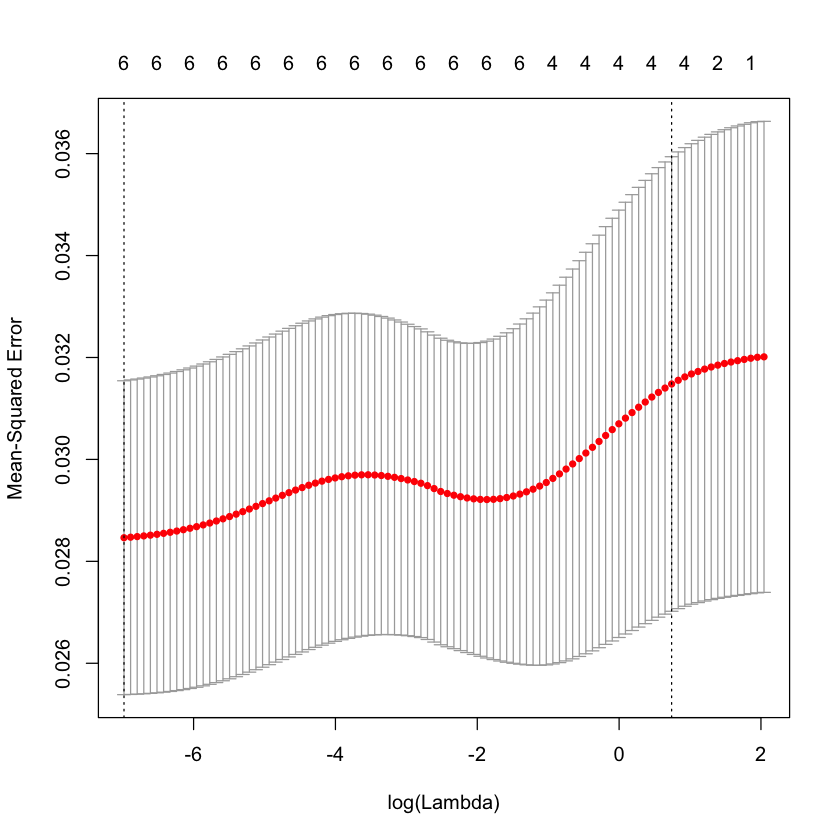

[1] 0.0009291127

[1] 2.097026

7 x 1 sparse Matrix of class "dgCMatrix"
                            1
(Intercept)        0.05094342
NE.IMP.GNFS.ZS     0.79545966
NE.TRD.GNFS.ZS    -0.75787642
NY.GDP.TOTL.RT.ZS  0.14683481
NY.GSR.NFCY.CD     0.07592060
SP.POP.GROW        0.11366417
SP.URB.TOTL.IN.ZS -0.20227666

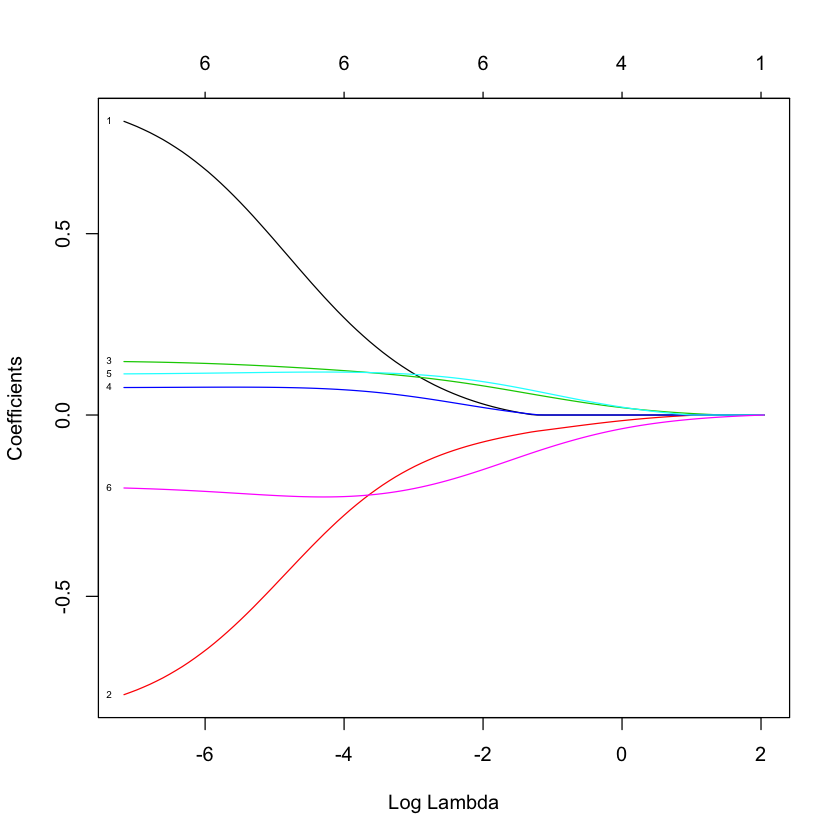

In [43]:
# Data = considering that we have a data frame named dataF, with its first column being the class
x <- as.matrix(dfNorm) # Removes class
y <- as.double(as.matrix(my_data[7])) # Only class

# Fitting the model (Lasso: Alpha = 1)
set.seed(999)
cv.lasso <- cv.glmnet(x, y, family="gaussian", alpha=0.01, parallel=TRUE, standardize=TRUE, type.measure='auc')

# Results
plot(cv.lasso)
plot(cv.lasso$glmnet.fit, xvar="lambda", label=TRUE)
cv.lasso$lambda.min
cv.lasso$lambda.1se
coef(cv.lasso, s=cv.lasso$lambda.min)

gpd

In [2]:
library("readxl")
my_data <- read_excel("data_clean.xlsx")

my_data<-my_data[c('country','cpi','gdp','hale','efi','democracy')]
# my_data

In [18]:
# my_data$hale
# my_data

In [14]:
linearMod <- lm(gdp ~ cpi+hale+efi, data=my_data)  # build linear regression model on full data
print(linearMod)
summary(linearMod) 


Call:
lm(formula = gdp ~ cpi + hale + efi, data = my_data)

Coefficients:
(Intercept)          cpi         hale          efi  
  -33105.75       746.39        84.54       135.31  




Call:
lm(formula = gdp ~ cpi + hale + efi, data = my_data)

Residuals:
   Min     1Q Median     3Q    Max 
-25688  -5278   -373   4285  59134 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -33105.75    9254.82  -3.577 0.000485 ***
cpi            746.39      81.76   9.129 9.82e-16 ***
hale            84.54     119.01   0.710 0.478724    
efi            135.31     160.60   0.843 0.401018    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10710 on 133 degrees of freedom
Multiple R-squared:  0.6961,	Adjusted R-squared:  0.6892 
F-statistic: 101.5 on 3 and 133 DF,  p-value: < 2.2e-16


In [20]:
# correlation matrix

d <- data.frame(hale=my_data$hale,
                cpi=my_data$cpi,
                gdp=my_data$gdp,
                efi=my_data$efi,
                democracy=my_data$democracy
               )

# d

cor(d)

,hale,cpi,gdp,efi,democracy
hale,1.0000000,0.5433205,0.4843675,0.4840152,0.4640977
cpi,0.5433205,1.0000000,0.8324710,0.7970358,0.7438018
gdp,0.4843675,0.8324710,1.0000000,0.6900276,0.5908137
efi,0.4840152,0.7970358,0.6900276,1.0000000,0.6017098
democracy,0.4640977,0.7438018,0.5908137,0.6017098,1.0000000


In [ ]:
ir.pca <- prcomp(log.ir,
                 center = TRUE,
                 scale. = TRUE) 

In [22]:
# plot( my_data$efi,my_data$gdp)


myPCA <- prcomp(mat, scale. = F, center = F)